## Introduction

Dengue is a mosquito-borne viral disease that has rapidly spread to many regions in recent years.

Dengue causes a wide spectrum of disease. Today, severe dengue affects most Asian and Latin American countries and has become a leading cause of hospitalization and death among children and adults in these regions [(WHO, 2022)](https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue#:~:text=The%20number%20of%20dengue%20cases,affecting%20mostly%20younger%20age%20group.).

By being able to predict the number of cases of dengue, it would be beneficial to the health sector and also reduce the impacts of dengue.

### Problem definition:
Are we able to predict the total number of cases in a week based on the environmental and climate data of that week?

What model would be best to predict it?



## Essential Libraries

We begin by importing the essential Python libraries.
- NumPy
- Pandas
- Matplotlib
- Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Import and combine features and labels

In [2]:
# importing features
features_df = pd.read_csv("dengue_features_train.csv")
features_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
# importing labels and removing repeat columns
labels_df = pd.read_csv("dengue_labels_train.csv")
labels_df = labels_df.drop(columns = ['city', 'year', 'weekofyear'])
labels_df.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [4]:
# combining features and labels
all_data = pd.concat([features_df, labels_df], axis = 1)
all_data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


## Data Exploration and Visualisation

### Data properties

Checking amount of rows in dataset to find out the size of the data we are working with

In [5]:
all_data.shape

(1456, 25)

In [6]:
all_data.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

From the data, we can split the variables into a few main categories:
- Time and city
- NDVI
- Temperature
- Humidity
- Precipitation

The only variable that needs further understanding is the ndvi columns. 

Normalised Difference Vegetation Index [(NDVI)](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) describes the difference between visible and near-infrared reflectance of vegetation cover and can be used to estimate the **density of green** on an area of land - basically the amount of vegetation in that particular area

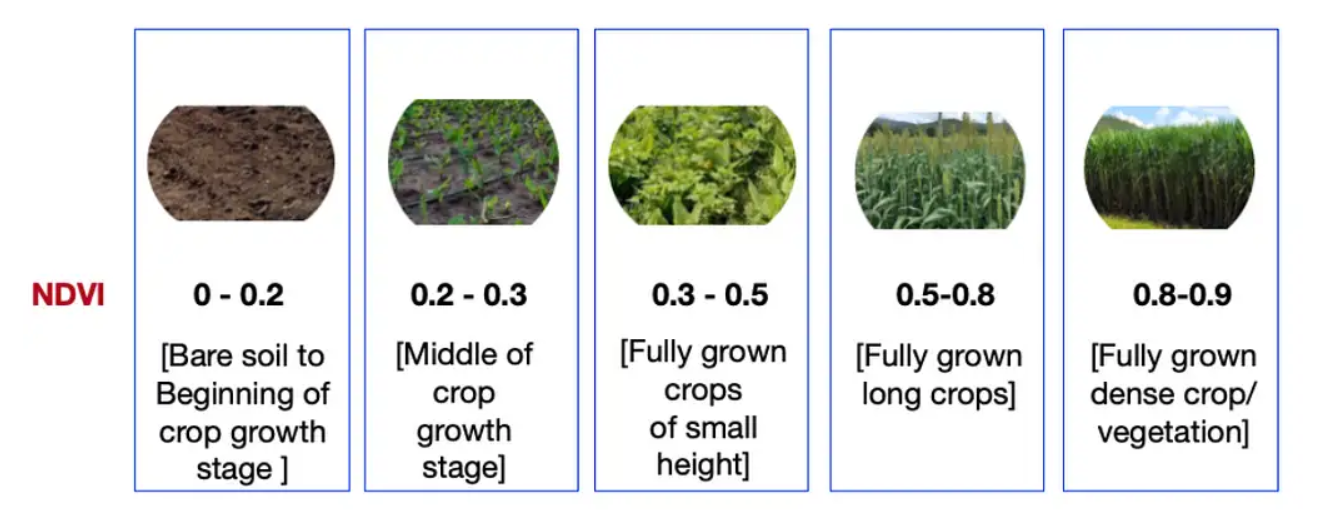

After loading in the data and observing the all_data dataframe on the surface level, we notice a few things:
- The rows are split into 2 groups by the column "city" as the data is from 2 different cities, San Juan (sj) and Iquitos (iq)
- There are some NaN values which will require some cleaning or handling

### Total cases

Statistics for total cases

In [7]:
all_data['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

We can take a look at how the total cases varies against time in the two different cities, San Juan and Iquitos

In [8]:
all_data['week_start_date'] = pd.to_datetime(all_data['week_start_date'])

In [9]:
group = all_data.groupby(features_df.city)
all_data_sj = group.get_group("sj")
sj_cases_time = pd.DataFrame(all_data_sj[['week_start_date', 'total_cases']])
sj_cases_time.set_index('week_start_date', inplace = True)
all_data_iq = group.get_group("iq")
iq_cases_time = pd.DataFrame(all_data_iq[['week_start_date', 'total_cases']])
iq_cases_time.set_index('week_start_date', inplace = True)

In [10]:
sj_cases_time["Iquitos"] = iq_cases_time.total_cases
both_cases_time = sj_cases_time.rename(columns={'total_cases': 'San Juan'})

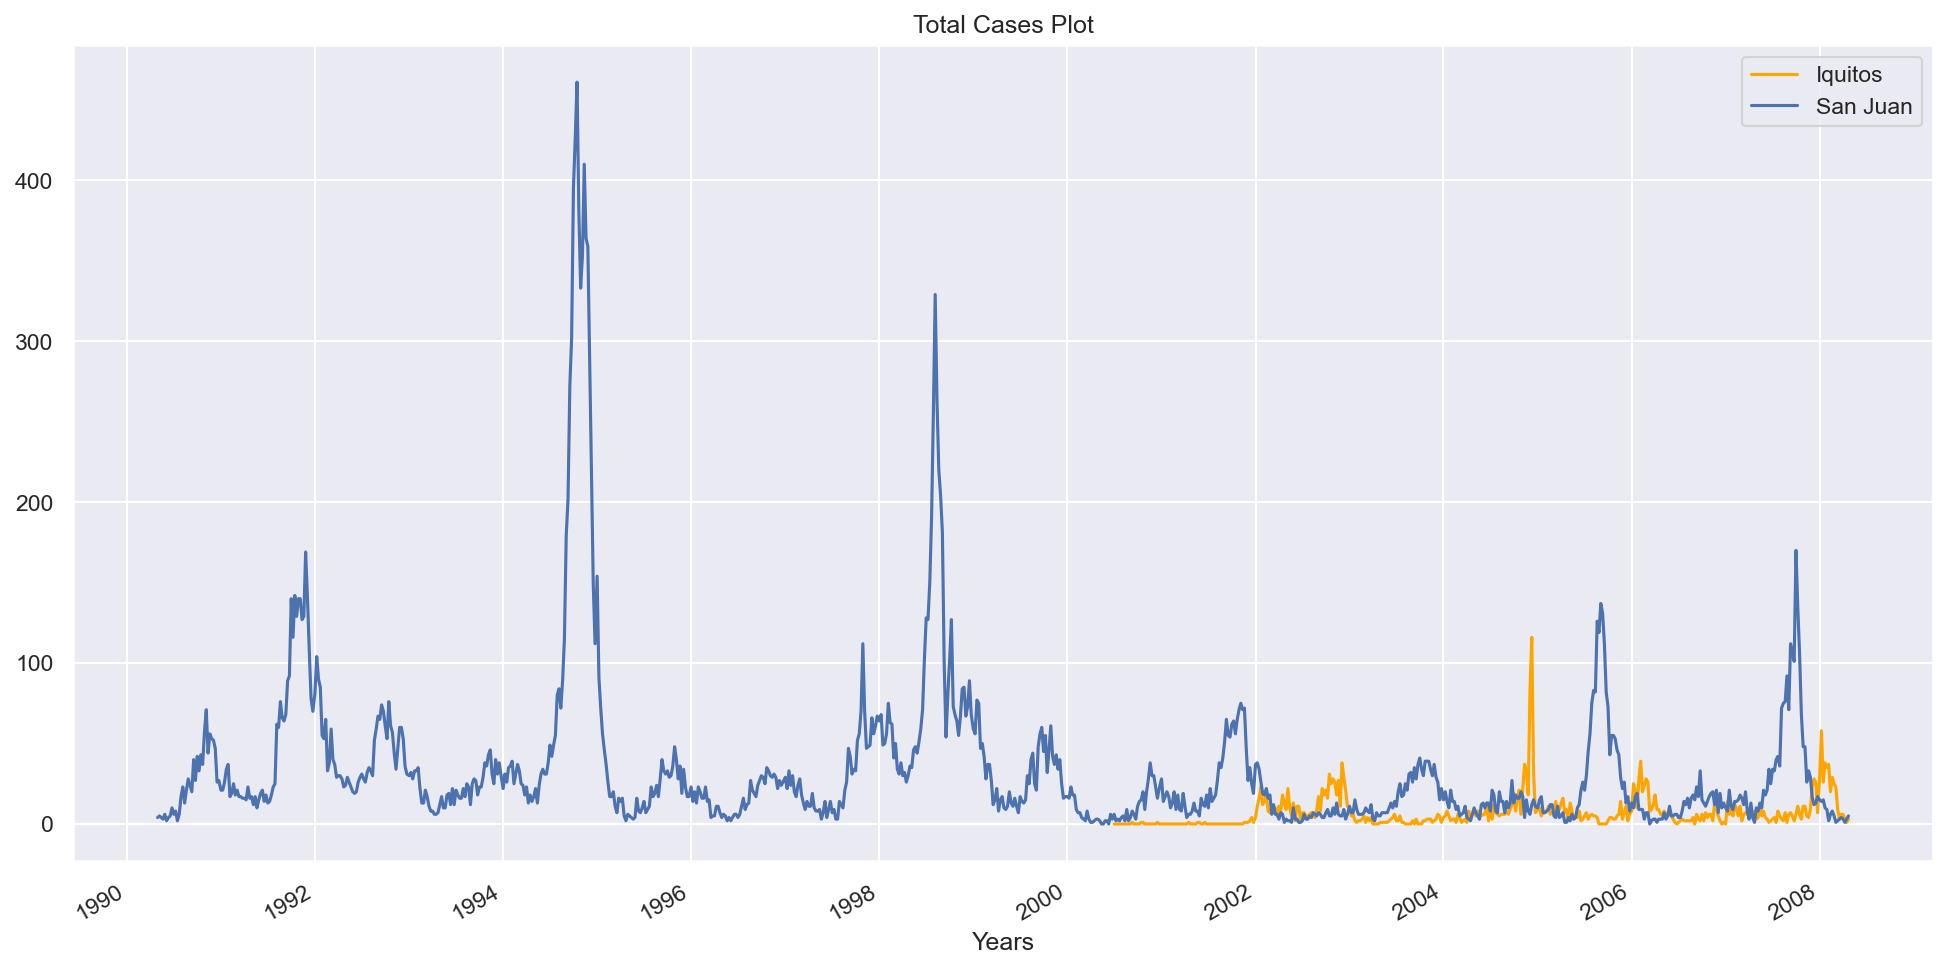

In [11]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
both_cases_time['Iquitos'].plot(label='Iquitos', color='orange')
both_cases_time['San Juan'].plot(label='San Juan')
  
# adding title to the plot
plt.title('Total Cases Plot')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

We can observe that we have total cases data from 1990 - 2008 for San Juan and only from 2000 - 2008 for Iquitos.

Also, the number of total cases is quite erratic for both cities.

### Numerical data
Numerical data makes up most of our data, with variables such as precipitation amount, air temperature, etc.

Let's take a look at the numeric data and their distributions

Based on our intuition, mosquitoes like it warm and wet. Our prediction of the main features and their relationships with total cases are:

**NDVI:** 
- higher NDVI would mean more vegetation and thus more potential breeding sites 
- higher total cases

**Temperature:**
- mosquito larvae require the temperature to be above a certain threshold to grow
- so higher temperature would result in higher total cases

**Precipitation:**
- higher precipitation would mean more rain, which also leads to more potential breeding sites
- higher total cases

**Humidity:**
- mosquitoes are more comfortable in humid weather
- higher humidity would mean higher total cases

We will find out if we are right through the data visualisation.

In [12]:
num_data = all_data.drop(columns = ['year', 'weekofyear', 'week_start_date', 'city'])
num_data.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


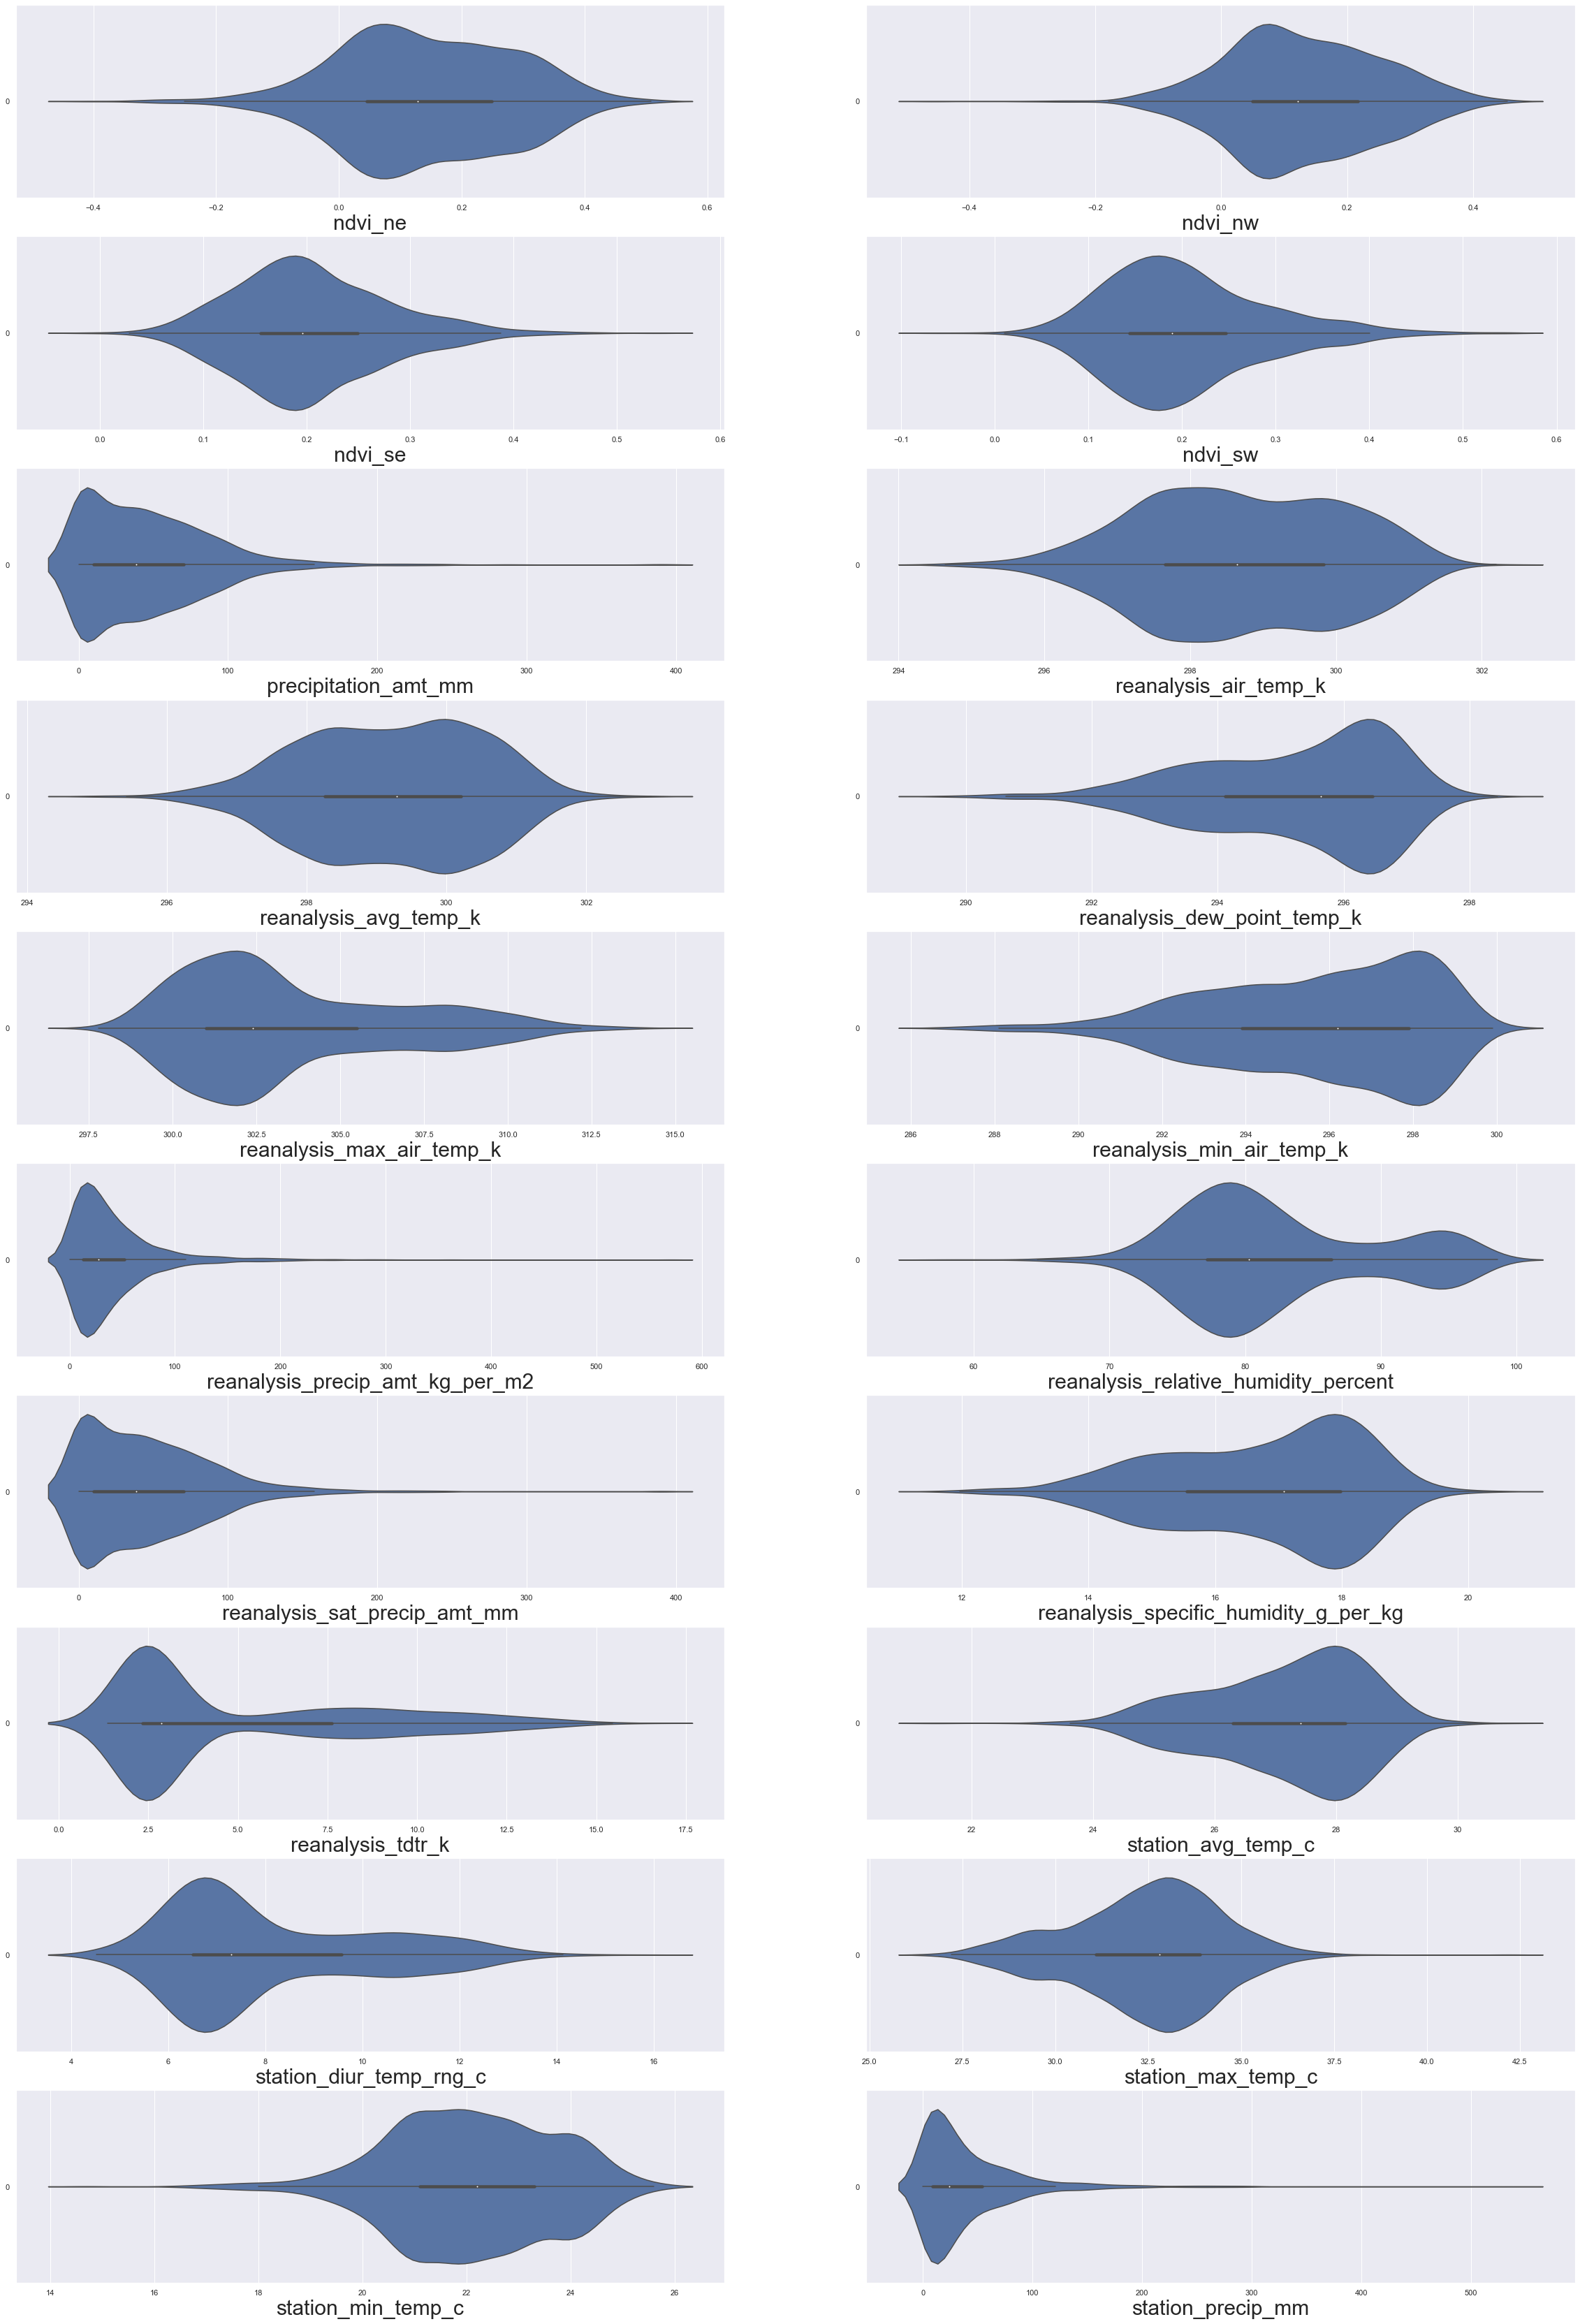

In [13]:
f, axes = plt.subplots(10,2,figsize=(40,60))
count = 0
row = 0

for var in num_data:
  if var != 'total_cases':
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = num_data[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

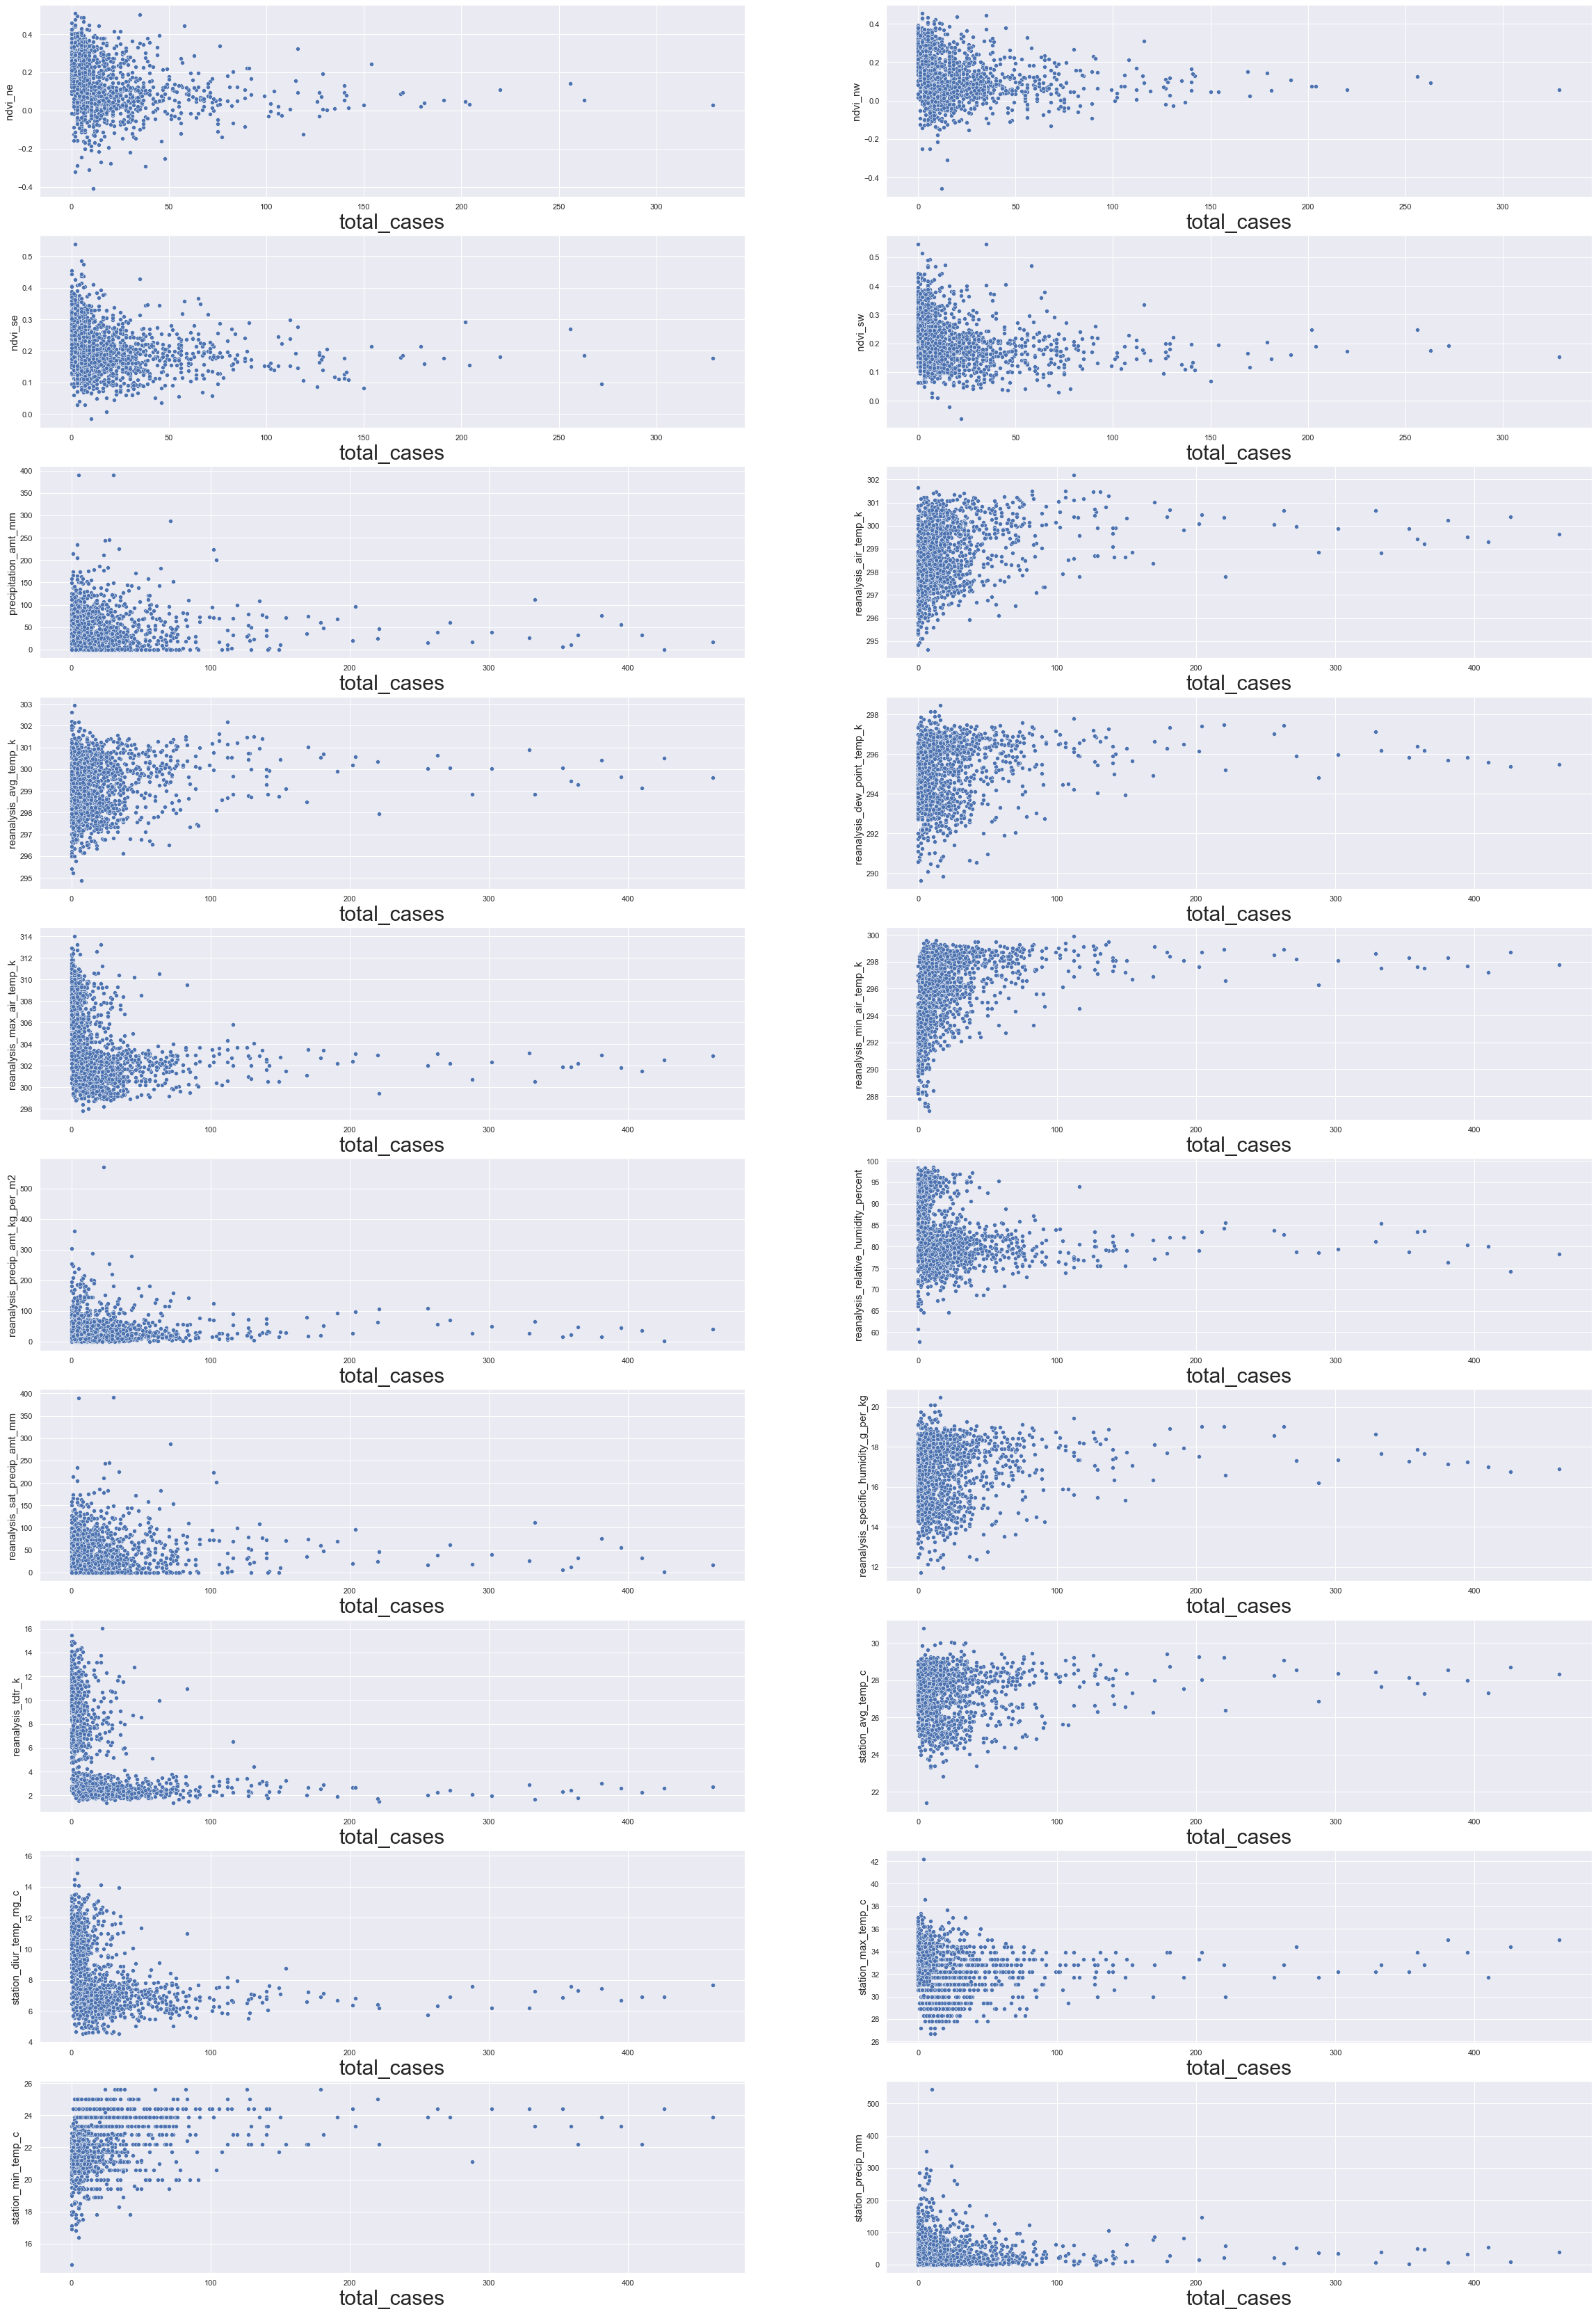

In [14]:
fig, axes = plt.subplots(10, 2, figsize =(40,60))

count = 0
row = 0 

for var in num_data:
  if var != 'total_cases':
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.scatterplot(x = num_data['total_cases'], y = num_data[var], data = num_data[var], ax = axes[row,col])
    ax = axes[row,col]
    ax.set_ylabel(var,fontsize=15)
    ax.set_xlabel('total_cases',fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

From the scatter plots, we can observe that the variables do not have strong linear correlation with total cases

To confirm, we take a look at the correlation between the different variables

<AxesSubplot:>

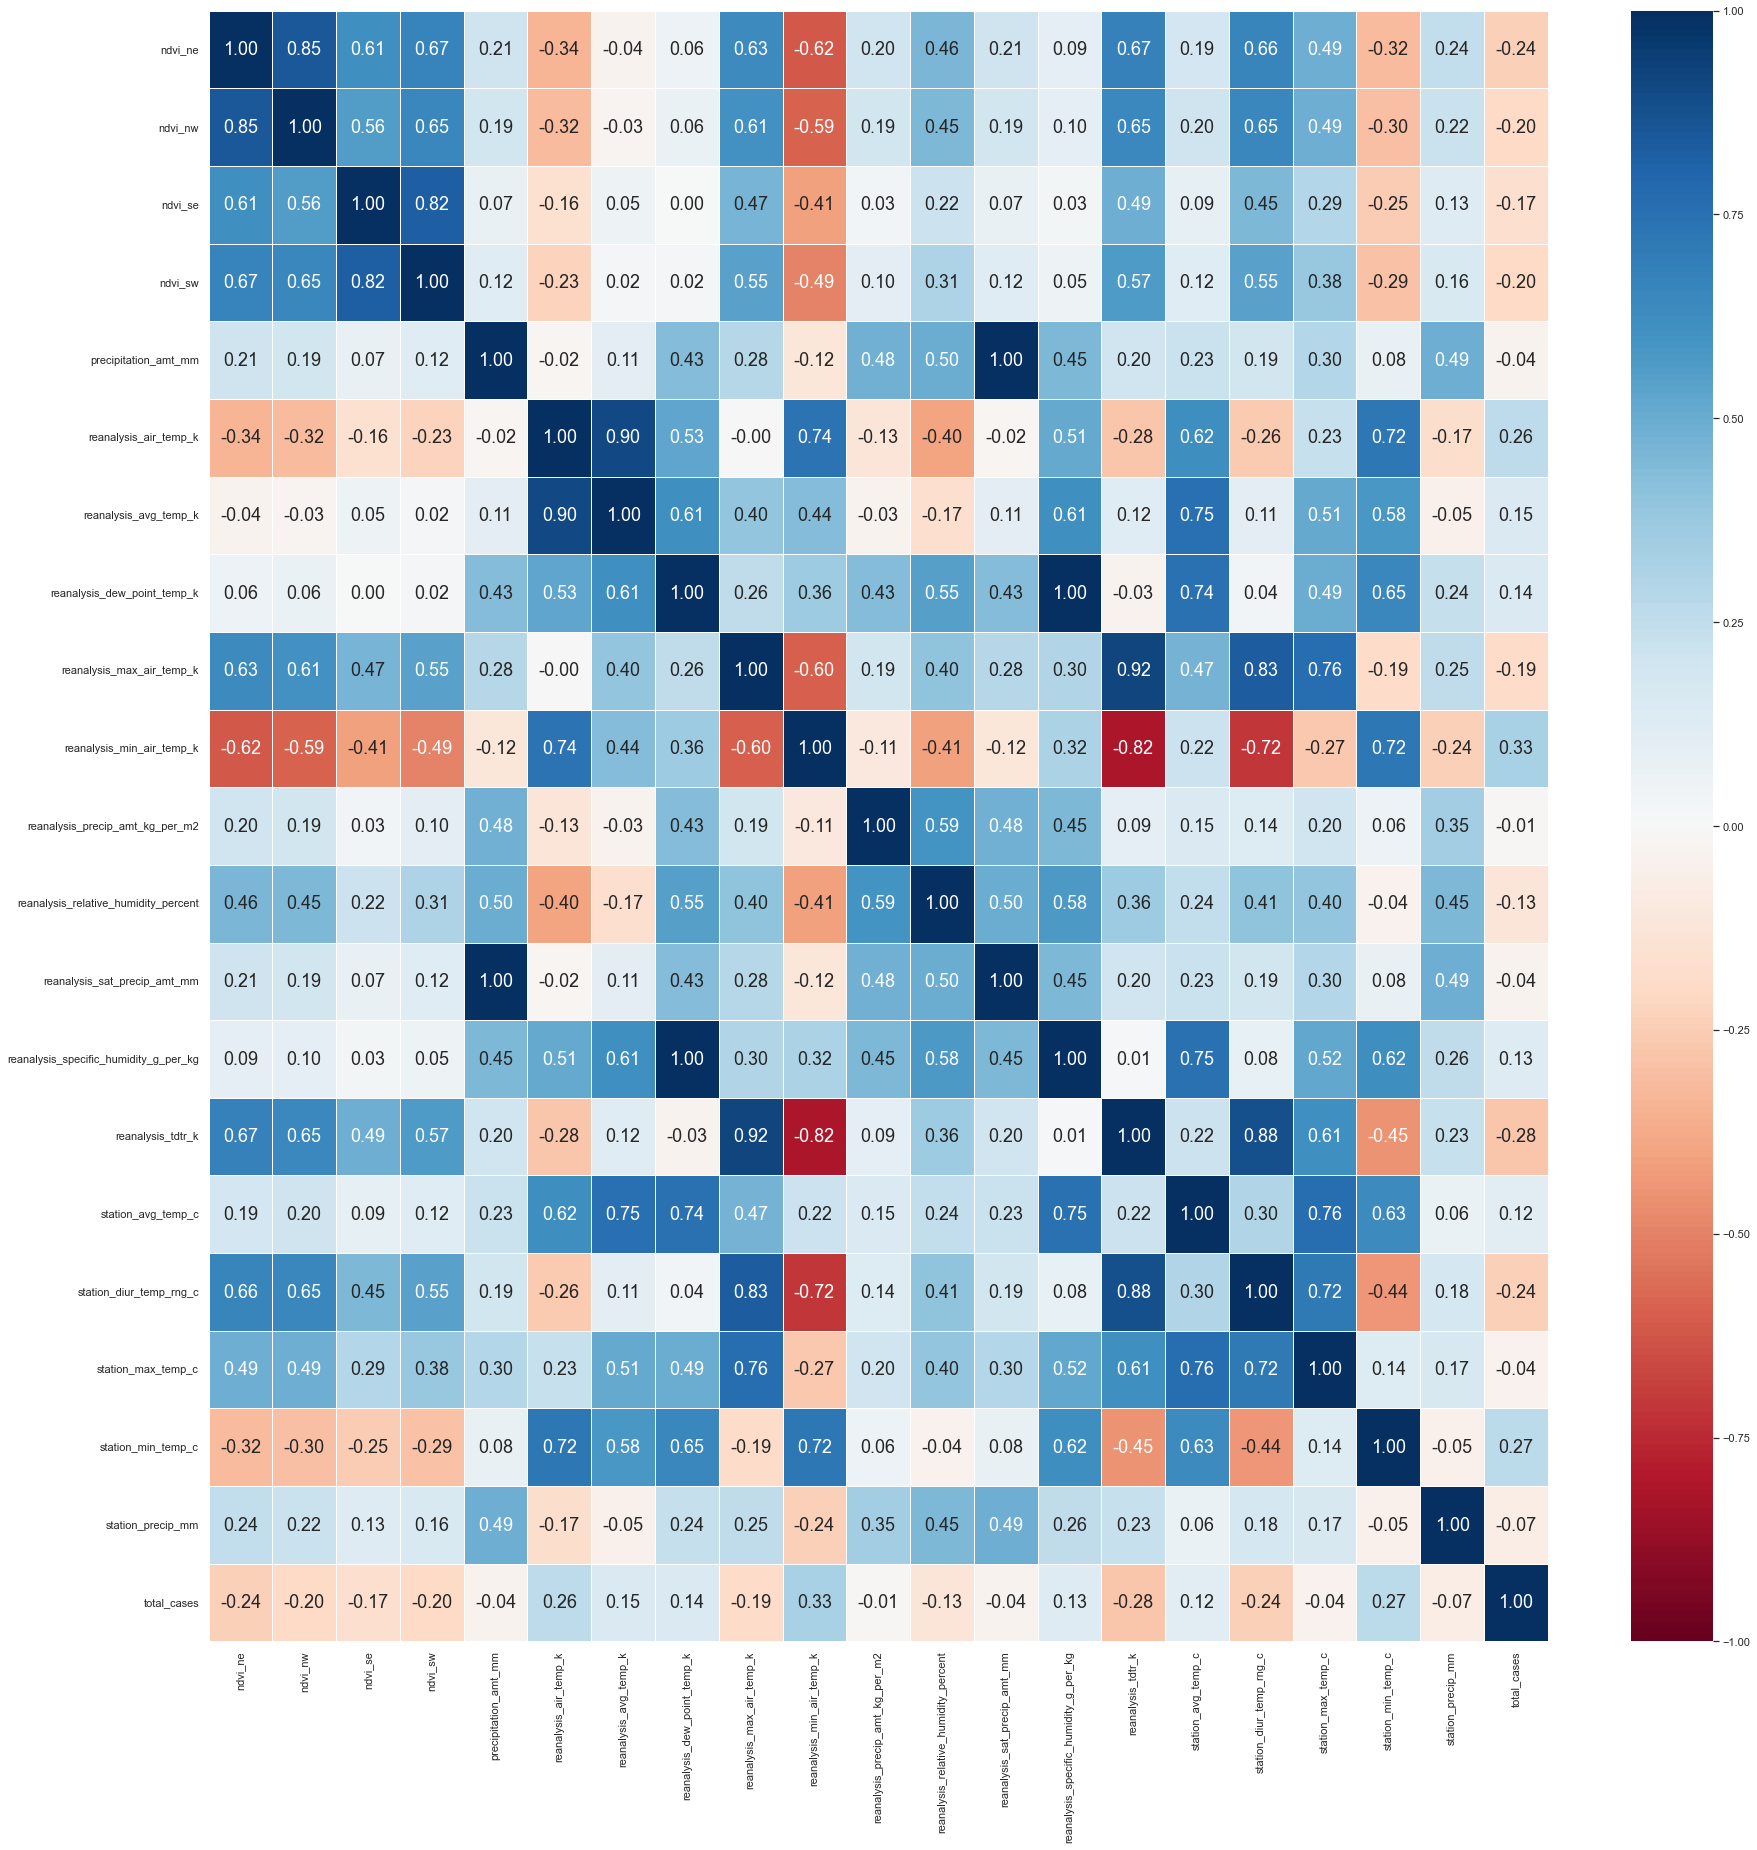

In [15]:
# heatmap of the Correlation Matrix
f = plt.figure(figsize=(30, 30))
sb.heatmap(num_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

As we can observe from the heatmap of correlation matrix, the correlation of the variables with "total_cases" are **mostly quite low**. 

Surprisingly, our predictions of linear relationships between the variables and the total cases were not very accurate as can be seen from the low correlation values.

However, they **may have non-linear relationship**, so we will explore non-linear models as well.

### Categorical data
For categorical data, we only have 1 column, the city.

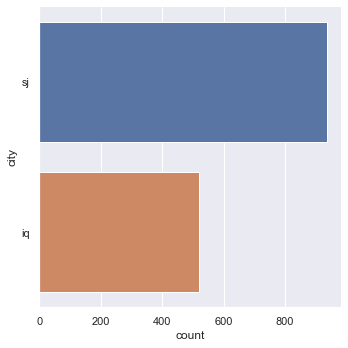

In [16]:
sb.catplot(y = "city", data = all_data, kind = "count")

We can observe that the number of rows of sj is almost 2 times of the rows of iq

<AxesSubplot:xlabel='total_cases', ylabel='city'>

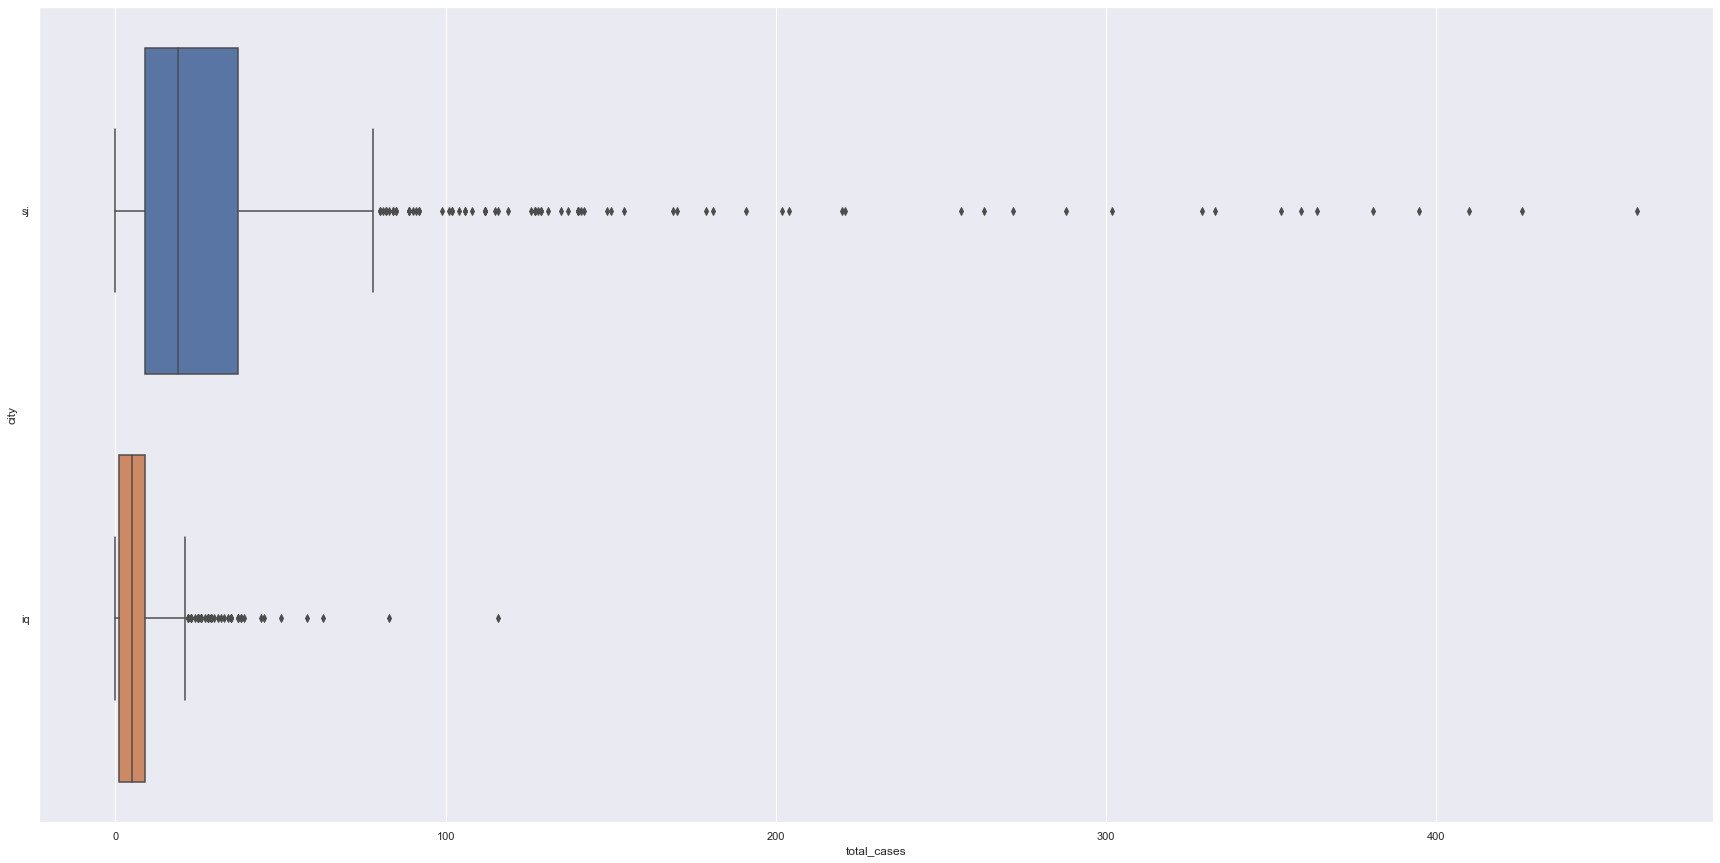

In [17]:
plt.figure(figsize=(30, 15))
sb.boxplot(data = all_data.loc[:, ["total_cases", "city"]], x="total_cases", y="city")

From the box plot of the cities against the total cases, we can see that the distributions are right skewed and that the distributions are quite close to each other. Thus, using cities to predict our total cases may not be reliable.

Furthermore, due to the lower number of rows of iq, we are going to use the combined model instead of splitting the data into the different cities.

### Conclusions
- the data contains null values which will require some cleaning or handling
- important to explore and visualise as our assumptions may be wrong
- most of the numerical data have weak linear relationship, so we plan to explore non-linear models as well
- the categorical data may not be a good variable to use for prediction